In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import os

In [2]:
# Step 1: Prepare the dataset
def prepare_data(train_dir, img_size=(224, 224), batch_size=32, validation_split=0.2):
    datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        brightness_range=[0.8, 1.2],
        validation_split=validation_split
    )
    
    train_data = datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )
    
    val_data = datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )
    
    return train_data, val_data

In [3]:
# Step 2: Build the model using MobileNetV2 for transfer learning
def build_model(num_classes, input_shape=(224, 224, 3)):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze the base model
    
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')  
    ])
    
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
# Step 3: Train the model
def train_model(model, train_data, val_data, epochs=15):
    history = model.fit(train_data, validation_data=val_data, epochs=epochs)
    return history

In [5]:
# Step 4: Plot training results
def plot_training(history):
    plt.figure(figsize=(12, 4))
    
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

In [6]:
# Step 5: Save the model
def save_model(model, model_path='plant_classifier_model.h5'):
    model.save(model_path)
    print(f"Model saved to {model_path}")

Found 669 images belonging to 8 classes.
Found 163 images belonging to 8 classes.
Epoch 1/15


C:\Users\Jay\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.3983 - loss: 1.7563 - val_accuracy: 0.7791 - val_loss: 0.5875
Epoch 2/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.7699 - loss: 0.6536 - val_accuracy: 0.8589 - val_loss: 0.3937
Epoch 3/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.9153 - loss: 0.3053 - val_accuracy: 0.9080 - val_loss: 0.3331
Epoch 4/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.9282 - loss: 0.2569 - val_accuracy: 0.9080 - val_loss: 0.2540
Epoch 5/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.9139 - loss: 0.2339 - val_accuracy: 0.8896 - val_loss: 0.3539
Epoch 6/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.9393 - loss: 0.1775 - val_accuracy: 0.9448 - val_loss: 0.1938
Epoch 7/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.9360 - loss: 0.1985 - val_accuracy: 0.9141 - val_loss: 0.2493
Epoch 8/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.9585 - loss: 0.1250 - val_accuracy: 0.9202 - val_loss: 0.3004
Epo

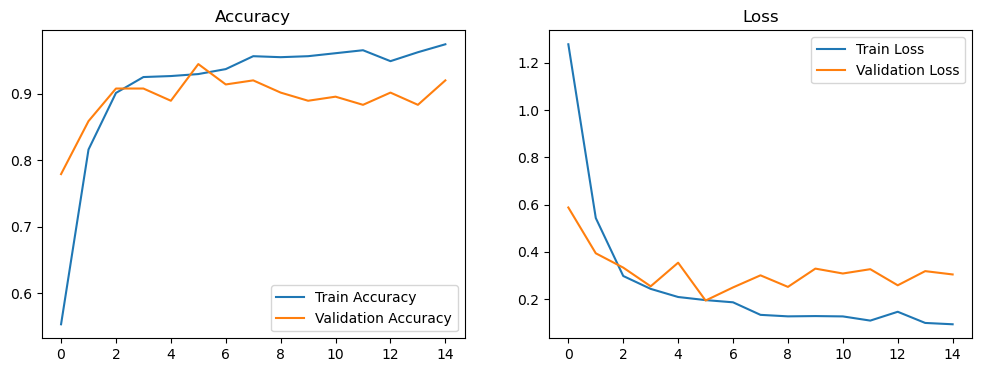

In [10]:
# Main function to run the full pipeline
if __name__ == "__main__":
    # Step 1: Prepare the data
    train_dir = r"C:\Users\Jay\Desktop\test"
    train_data, val_data = prepare_data(train_dir)

    # Get the number of classes
    num_classes = len(train_data.class_indices)
    class_names = list(train_data.class_indices.keys())

    # Step 2: Build the model
    model = build_model(num_classes)

    # Step 3: Train the model
    history = train_model(model, train_data, val_data, epochs = 15)

    # Step 4: Plot training results
    plot_training(history)



In [11]:
# Step 5: Save the model
save_model(model)

Model saved to plant_classifier_model.h5


In [15]:
# Get the number of classes and class names
num_classes = len(train_data.class_indices)
class_names = list(train_data.class_indices.keys())
    
print("Class names: ",class_names)

Class names:  ['Amaranthus Green', 'Balloon vine', 'Betel Leaves', 'Celery', 'Chinese Spinach', 'Coriander Leaves', 'Curry Leaf', 'Dwarf Copperleaf (Green)']


In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import os

# Step 1: Load the saved model
def load_trained_model(model_path='plant_classifier_model.h5'):
    model = load_model(model_path)
    return model

# Step 2: Preprocess new image
def preprocess_image(img_path, img_size=(224, 224)):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Rescale the image
    return img_array

# Step 3: Make prediction on new image
def predict_new_image(model, img_array, class_names):
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    return class_names[predicted_class[0]]

# Main function to test the model on new images
if __name__ == "__main__":
    # Step 1: Load the trained model
    model_path = 'plant_classifier_model.h5'
    model = load_trained_model(model_path)

    # Class names from training (should be known from training script)
    class_names = class_names  # Replace with actual class names

    # Step 2: Preprocess and predict new image
    test_image_path = r"C:\Users\Jay\Desktop\curry1.jpg"  # Provide the path to your new image
    img_array = preprocess_image(test_image_path)
    
    # Step 3: Predict class of the image
    predicted_class = predict_new_image(model, img_array, class_names)
    print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: Curry Leaf
